So from task3_analysis.ipynb we saw that 6th column and target are related. 

As I have said before in task3_analysis.ipynb, I prefer ML solution so you can check it in task3_regression.ipynb but I will provide You also with DL solution in file called task3_neural_network.ipynb

Let's build a simple ML model that will predict *a,b,c* parameters for function:
$$
y=ax^2+bx+c. 
$$
Let's start coding our polynomial regression

First of all we should do some imports(tensorflow as main tool for ML and matplotlib for visualization)

In [337]:
import tensorflow as tf
import matplotlib.pyplot as plt

Let's get and preprocess the data we think is the most critical for our model(6th and 'target' columns from intership_train.csv)

In [338]:
import pandas as pd
import numpy as np
X_train = pd.read_csv('Data/internship_train.csv')['6']
X_train = np.array(features)
y_train = pd.read_csv('Data/internship_train.csv')['target']
y_train = np.array(labels)
X_train,y_train

(array([-4.47213595,  7.81024968,  8.60232527, ...,  6.164414  ,
        -3.60555128,  7.68114575]),
 array([20.10747174, 61.76371332, 74.651162  , ..., 38.63370433,
        13.68730853, 59.61320747]))

Also we need get and preprocess test data from intership_hidden_test.csv 

In [339]:
X_test = pd.read_csv('Data/internship_hidden_test.csv')
X_test = np.array(X_test['6'])
X_test

array([ 3.31662479, -8.88819442,  2.64575131, ...,  4.69041576,
        4.        ,  9.53939201])

Let's define our Root-mean-square error function

In [340]:
def rmse(y_pred, y_true):
    mse = tf.reduce_mean(tf.square(y_pred - y_true))
    rmse = tf.sqrt(mse)
    return rmse

Let's define our regression function that will get our parameters X, a,b,c to function:
$$
y=ax^2+bx+c
$$

In [341]:
def regression(my_x, my_a, my_b, my_c):
  return (my_x**2)*my_a + my_x*my_b + my_c

...And a small function to predict that will not depend on a,b,c but only will get X as a parameter

In [342]:
def predict(X):
    return regression(X,a,b,c)

Also we need a function that will plot y=f(x) dependency
and will show $$y=x^2$$ curve to compare our results

In [343]:
def plot_func(x, y):
    """
    Function to plot y=f(x)
    
    """
    fig, ax = plt.subplots()
    ax.scatter(x, y, label="Predicted")
    x_squared = np.linspace(np.min(x), np.max(x), 100)
    y_squared = x_squared ** 2
    ax.plot(x_squared, y_squared, color='r', label="y=x^2")
    
    plt.xlabel('Feature Values')
    plt.ylabel('Labels Values')
    plt.title('Plot of Labels vs Features')
    plt.legend()
    plt.show()

Let's define starting a,b,c parameters with random numbers and copy them to compare result later

In [344]:
a = tf.Variable([5.23])
b = tf.Variable([2.12])
c = tf.Variable([7.4])

trainable_variables = [a,b,c]

#Let's copy them to compare result later
a_start = a.numpy()
b_start = b.numpy()
c_start = c.numpy()

Let's plot it and see with what we are starting

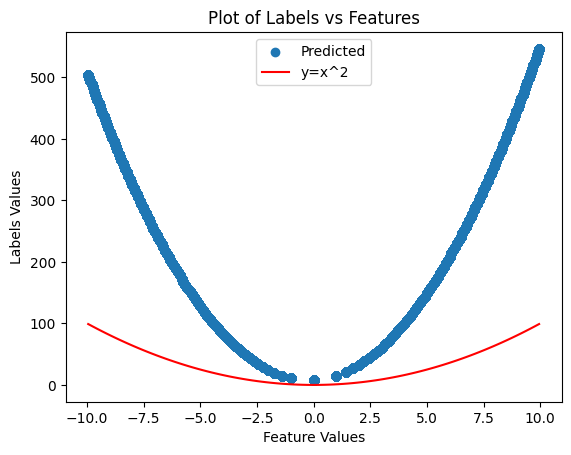

In [345]:
plot_func(X_train, regression(X_train, a,b,c))

Looks really horrible but will figure it out

Let's define starting cost, gradients and optimizer(I have chosen Adam optimizer because it's updates of learning rate)

In [346]:
with tf.GradientTape(persistent=True) as t:
  C = rmse(regression(X_train,a,b,c), y_train)

In [347]:
gradients = t.gradient(C, trainable_variables)
gradients

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([57.238388], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.41423452], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.86914265], dtype=float32)>]

In [348]:
opt = tf.optimizers.Adam(learning_rate=0.01)
opt.apply_gradients(zip(gradients, trainable_variables))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [349]:
a,b,c

(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([5.2200003], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.1100001], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([7.3900003], dtype=float32)>)

Let's start our machine learning magic!

In [350]:
epochs = 1000
for epoch in range(epochs):
  with tf.GradientTape() as t:
    C = rmse(regression(X_train,a,b,c),y_train)
  gradients = t.gradient(C, trainable_variables)
  opt.apply_gradients(zip(gradients, trainable_variables))
  print('Epoch {}, cost {}, a grad {}, b grad {}, c grad {}'.format(epoch, 
                                                                    '%.3g' % C.numpy(), 
                                                                    '%.3g' % gradients[0].numpy(), 
                                                                    '%.3g' % gradients[1].numpy(),
                                                                    '%.3g' % gradients[2].numpy()))

Epoch 0, cost 248, a grad 57.2, b grad 0.413, c grad 0.869
Epoch 1, cost 248, a grad 57.2, b grad 0.412, c grad 0.869
Epoch 2, cost 247, a grad 57.2, b grad 0.411, c grad 0.869
Epoch 3, cost 247, a grad 57.2, b grad 0.41, c grad 0.869
Epoch 4, cost 246, a grad 57.2, b grad 0.409, c grad 0.869
Epoch 5, cost 245, a grad 57.2, b grad 0.408, c grad 0.869
Epoch 6, cost 245, a grad 57.2, b grad 0.407, c grad 0.869
Epoch 7, cost 244, a grad 57.2, b grad 0.406, c grad 0.869
Epoch 8, cost 244, a grad 57.2, b grad 0.405, c grad 0.869
Epoch 9, cost 243, a grad 57.2, b grad 0.404, c grad 0.869
Epoch 10, cost 243, a grad 57.2, b grad 0.403, c grad 0.869
Epoch 11, cost 242, a grad 57.2, b grad 0.402, c grad 0.869
Epoch 12, cost 241, a grad 57.2, b grad 0.401, c grad 0.869
Epoch 13, cost 241, a grad 57.2, b grad 0.4, c grad 0.869
Epoch 14, cost 240, a grad 57.2, b grad 0.399, c grad 0.869
Epoch 15, cost 240, a grad 57.2, b grad 0.398, c grad 0.869
Epoch 16, cost 239, a grad 57.2, b grad 0.397, c grad

Epoch 138, cost 168, a grad 57.3, b grad 0.245, c grad 0.871
Epoch 139, cost 167, a grad 57.3, b grad 0.243, c grad 0.871
Epoch 140, cost 167, a grad 57.3, b grad 0.242, c grad 0.871
Epoch 141, cost 166, a grad 57.3, b grad 0.241, c grad 0.871
Epoch 142, cost 165, a grad 57.3, b grad 0.239, c grad 0.872
Epoch 143, cost 165, a grad 57.3, b grad 0.238, c grad 0.872
Epoch 144, cost 164, a grad 57.3, b grad 0.236, c grad 0.872
Epoch 145, cost 164, a grad 57.3, b grad 0.235, c grad 0.872
Epoch 146, cost 163, a grad 57.3, b grad 0.234, c grad 0.872
Epoch 147, cost 162, a grad 57.3, b grad 0.232, c grad 0.872
Epoch 148, cost 162, a grad 57.3, b grad 0.231, c grad 0.872
Epoch 149, cost 161, a grad 57.3, b grad 0.229, c grad 0.872
Epoch 150, cost 161, a grad 57.3, b grad 0.228, c grad 0.872
Epoch 151, cost 160, a grad 57.3, b grad 0.227, c grad 0.872
Epoch 152, cost 160, a grad 57.3, b grad 0.225, c grad 0.872
Epoch 153, cost 159, a grad 57.3, b grad 0.224, c grad 0.872
Epoch 154, cost 158, a g

Epoch 279, cost 85.5, a grad 57.3, b grad 0.0548, c grad 0.876
Epoch 280, cost 84.9, a grad 57.3, b grad 0.0537, c grad 0.876
Epoch 281, cost 84.3, a grad 57.3, b grad 0.0527, c grad 0.876
Epoch 282, cost 83.8, a grad 57.3, b grad 0.0516, c grad 0.876
Epoch 283, cost 83.2, a grad 57.3, b grad 0.0506, c grad 0.876
Epoch 284, cost 82.6, a grad 57.3, b grad 0.0496, c grad 0.876
Epoch 285, cost 82, a grad 57.3, b grad 0.0485, c grad 0.876
Epoch 286, cost 81.4, a grad 57.3, b grad 0.0475, c grad 0.876
Epoch 287, cost 80.9, a grad 57.3, b grad 0.0465, c grad 0.876
Epoch 288, cost 80.3, a grad 57.3, b grad 0.0455, c grad 0.876
Epoch 289, cost 79.7, a grad 57.3, b grad 0.0446, c grad 0.876
Epoch 290, cost 79.1, a grad 57.3, b grad 0.0436, c grad 0.876
Epoch 291, cost 78.5, a grad 57.3, b grad 0.0426, c grad 0.876
Epoch 292, cost 77.9, a grad 57.3, b grad 0.0417, c grad 0.876
Epoch 293, cost 77.4, a grad 57.3, b grad 0.0407, c grad 0.876
Epoch 294, cost 76.8, a grad 57.3, b grad 0.0398, c grad 

Epoch 419, cost 4.27, a grad 54.3, b grad 0.00217, c grad 0.977
Epoch 420, cost 3.73, a grad 53.3, b grad 0.00199, c grad 0.984
Epoch 421, cost 3.21, a grad 51.9, b grad 0.00178, c grad 0.991
Epoch 422, cost 2.71, a grad 49.5, b grad 0.00151, c grad 0.994
Epoch 423, cost 2.24, a grad 45.6, b grad 0.00118, c grad 0.985
Epoch 424, cost 1.83, a grad 38.5, b grad 0.000764, c grad 0.945
Epoch 425, cost 1.52, a grad 26.2, b grad 0.000248, c grad 0.833
Epoch 426, cost 1.36, a grad 7.78, b grad -0.000299, c grad 0.605
Epoch 427, cost 1.37, a grad -11.9, b grad -0.000705, c grad 0.302
Epoch 428, cost 1.5, a grad -26.5, b grad -0.000917, c grad 0.038
Epoch 429, cost 1.69, a grad -35.2, b grad -0.00102, c grad -0.143
Epoch 430, cost 1.86, a grad -40.3, b grad -0.0011, c grad -0.257
Epoch 431, cost 2.01, a grad -43.2, b grad -0.00118, c grad -0.327
Epoch 432, cost 2.12, a grad -44.8, b grad -0.00127, c grad -0.369
Epoch 433, cost 2.18, a grad -45.7, b grad -0.00138, c grad -0.391
Epoch 434, cost 2

Epoch 559, cost 0.995, a grad -0.315, b grad 1.35e-05, c grad 0.477
Epoch 560, cost 0.992, a grad -0.33, b grad 1.4e-05, c grad 0.477
Epoch 561, cost 0.989, a grad -0.351, b grad 1.35e-05, c grad 0.477
Epoch 562, cost 0.986, a grad -0.376, b grad 1.49e-05, c grad 0.476
Epoch 563, cost 0.983, a grad -0.404, b grad 1.35e-05, c grad 0.476
Epoch 564, cost 0.981, a grad -0.432, b grad 1.02e-05, c grad 0.475
Epoch 565, cost 0.978, a grad -0.458, b grad 1e-05, c grad 0.474
Epoch 566, cost 0.975, a grad -0.48, b grad 1.02e-05, c grad 0.474
Epoch 567, cost 0.972, a grad -0.498, b grad 8.17e-06, c grad 0.474
Epoch 568, cost 0.969, a grad -0.509, b grad 5.57e-06, c grad 0.473
Epoch 569, cost 0.966, a grad -0.515, b grad 4.62e-06, c grad 0.473
Epoch 570, cost 0.963, a grad -0.515, b grad 5.54e-06, c grad 0.473
Epoch 571, cost 0.96, a grad -0.509, b grad 6.99e-06, c grad 0.473
Epoch 572, cost 0.957, a grad -0.5, b grad 8.05e-06, c grad 0.473
Epoch 573, cost 0.954, a grad -0.486, b grad 7.62e-06, c 

Epoch 699, cost 0.592, a grad -0.383, b grad 7.55e-06, c grad 0.434
Epoch 700, cost 0.59, a grad -0.382, b grad 9.47e-06, c grad 0.434
Epoch 701, cost 0.587, a grad -0.381, b grad 9.33e-06, c grad 0.433
Epoch 702, cost 0.584, a grad -0.381, b grad 1.11e-05, c grad 0.432
Epoch 703, cost 0.582, a grad -0.38, b grad 9.97e-06, c grad 0.432
Epoch 704, cost 0.579, a grad -0.38, b grad 8.34e-06, c grad 0.431
Epoch 705, cost 0.576, a grad -0.379, b grad 6.63e-06, c grad 0.43
Epoch 706, cost 0.574, a grad -0.378, b grad 8.89e-06, c grad 0.43
Epoch 707, cost 0.571, a grad -0.377, b grad 7.08e-06, c grad 0.429
Epoch 708, cost 0.568, a grad -0.377, b grad 5.43e-06, c grad 0.428
Epoch 709, cost 0.566, a grad -0.376, b grad 8.65e-06, c grad 0.428
Epoch 710, cost 0.563, a grad -0.375, b grad 1.16e-05, c grad 0.427
Epoch 711, cost 0.56, a grad -0.375, b grad 1.19e-05, c grad 0.426
Epoch 712, cost 0.558, a grad -0.374, b grad 1.05e-05, c grad 0.425
Epoch 713, cost 0.555, a grad -0.373, b grad 5.99e-06,

Epoch 839, cost 0.322, a grad -0.189, b grad -2.91e-06, c grad 0.221
Epoch 840, cost 0.321, a grad -0.187, b grad -3.17e-07, c grad 0.219
Epoch 841, cost 0.321, a grad -0.185, b grad 2.07e-05, c grad 0.217
Epoch 842, cost 0.32, a grad -0.183, b grad 5.62e-06, c grad 0.214
Epoch 843, cost 0.319, a grad -0.181, b grad -3.35e-06, c grad 0.212
Epoch 844, cost 0.318, a grad -0.178, b grad -1.28e-05, c grad 0.21
Epoch 845, cost 0.318, a grad -0.176, b grad 1.6e-05, c grad 0.207
Epoch 846, cost 0.317, a grad -0.174, b grad 1.79e-05, c grad 0.205
Epoch 847, cost 0.316, a grad -0.173, b grad 1.38e-06, c grad 0.203
Epoch 848, cost 0.315, a grad -0.171, b grad -6.43e-06, c grad 0.2
Epoch 849, cost 0.315, a grad -0.169, b grad 3.76e-06, c grad 0.198
Epoch 850, cost 0.314, a grad -0.167, b grad 2.8e-06, c grad 0.196
Epoch 851, cost 0.313, a grad -0.165, b grad 9.45e-06, c grad 0.194
Epoch 852, cost 0.313, a grad -0.164, b grad 3.51e-06, c grad 0.191
Epoch 853, cost 0.312, a grad -0.161, b grad 4.17

Epoch 959, cost 0.29, a grad -0.0307, b grad -1.34e-05, c grad 0.0375
Epoch 960, cost 0.289, a grad -0.031, b grad -3.11e-06, c grad 0.0368
Epoch 961, cost 0.289, a grad -0.0303, b grad 1.21e-05, c grad 0.0362
Epoch 962, cost 0.289, a grad -0.0297, b grad 6.09e-06, c grad 0.0355
Epoch 963, cost 0.289, a grad -0.0303, b grad -2.45e-06, c grad 0.0349
Epoch 964, cost 0.289, a grad -0.0299, b grad -9.35e-06, c grad 0.0343
Epoch 965, cost 0.289, a grad -0.0301, b grad 1.54e-06, c grad 0.0337
Epoch 966, cost 0.289, a grad -0.0292, b grad 6.69e-06, c grad 0.0331
Epoch 967, cost 0.289, a grad -0.028, b grad 5.28e-06, c grad 0.0326
Epoch 968, cost 0.289, a grad -0.0268, b grad -2.02e-06, c grad 0.032
Epoch 969, cost 0.289, a grad -0.0258, b grad -2.04e-06, c grad 0.0314
Epoch 970, cost 0.289, a grad -0.0247, b grad -2.42e-06, c grad 0.0309
Epoch 971, cost 0.289, a grad -0.0248, b grad -1.13e-06, c grad 0.0304
Epoch 972, cost 0.289, a grad -0.0255, b grad 5.83e-06, c grad 0.0298
Epoch 973, cost 

So let's compare results

Before:

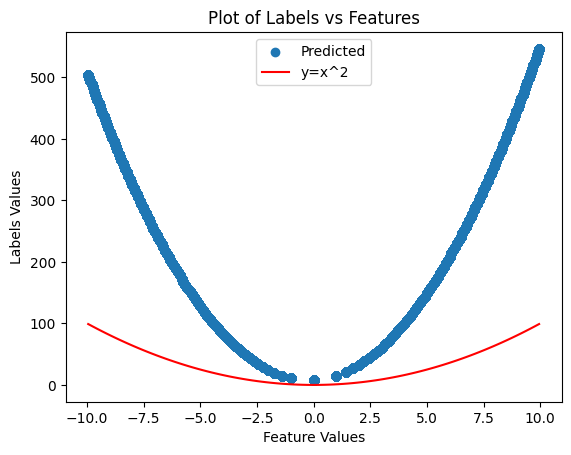

In [351]:
plot_func(X_train, regression(X_train, a_start,b_start,c_start))

After:

Cost(RMSE) - 0.2888759970664978


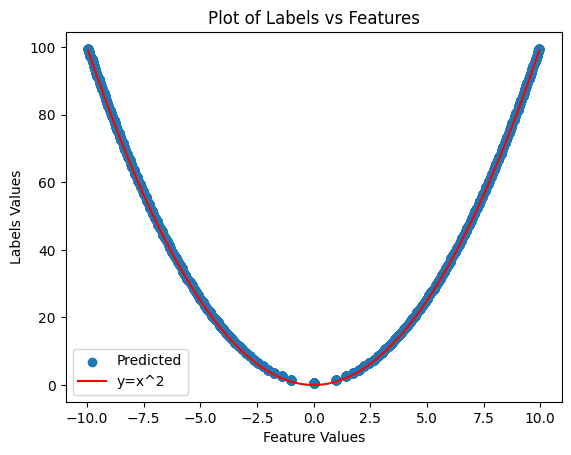

In [352]:
print(f"Cost(RMSE) - {C.numpy()}")
plot_func(X_test, predict(X_test))

Let's save our results

In [354]:
predictions = predict(X_test)
np.savetxt('results/predictions_ML.csv', predictions, delimiter=',')